---
title: "Introduction to Clustering and Dimensionality Reduction"
teaching: 30
exercises: 20
---


# Introduction to Clustering and Dimensionality Reduction

**Clustering** is an **unsupervised learning** method that groups similar data points based on feature similarity, rather than relying on labels. It helps uncover hidden patterns in data.

**Why is it useful?**
- Discover customer segments in marketing data  
- Detect anomalies in network traffic or IoT data  
- Compress images by grouping similar colors  
- Identify disease subtypes in healthcare  
- Cluster news articles by topic  

In this notebook:
1. Overview of clustering methods  
2. Overview of dimensionality reduction  
3. An interactive demo: K-means on a toy dataset  
4. Metrics to evaluate clustering results  


## Methods Covered

### Clustering Algorithms
- **K-means**  
  Partitions data into \(k\) clusters by minimizing within-cluster variance.
- **Hierarchical Clustering**  
  Builds nested clusters via agglomerative or divisive linkage.
- **DBSCAN (Density-Based)**  
  Finds clusters of arbitrary shape and identifies noise.

### Dimensionality Reduction
- **PCA (Principal Component Analysis)**  
  Linearly projects data into directions that maximize variance.
- **t-SNE (t-Distributed Stochastic Neighbor Embedding)**  
  Non-linear technique optimized for visual separation in low-D.

### Evaluation Metrics
- **Silhouette Score** (−1 to 1): compactness vs separation  
- **Davies–Bouldin Index**: average distance ratio of clusters  
- **Calinski–Harabasz Index**: variance ratio  
- **Visual Inspection**: critical for clustering quality


Let's start with a hands-on demo using **k-means** on a synthetic dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd

sns.set(style="whitegrid", palette="muted", font_scale=1.2)


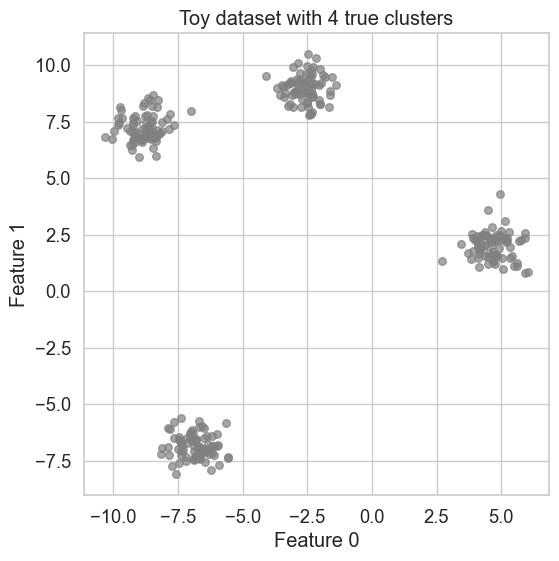

In [2]:
# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=30, color='grey', alpha=0.7)
plt.title("Toy dataset with 4 true clusters")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()


In [3]:
results = []
ks = [2, 3, 4, 5, 6]
for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    sil = silhouette_score(X, labels)
    db = davies_bouldin_score(X, labels)
    results.append((k, sil, db))

# Show results
df = pd.DataFrame(results, columns=["k","Silhouette","Davies-Bouldin"])
df


,k,Silhouette,Davies-Bouldin
0,2,0.615485,0.483750
1,3,0.799280,0.312296
2,4,0.875647,0.173674
3,5,0.731072,0.587863
4,6,0.585323,0.844187


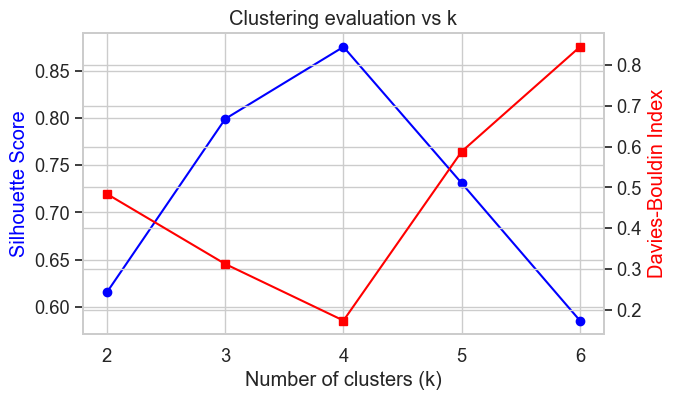

In [4]:
# Plot results
fig, ax1 = plt.subplots(figsize=(7, 4))
ax2 = ax1.twinx()
ax1.plot(df.k, df.Silhouette, marker='o', color='blue', label='Silhouette')
ax2.plot(df.k, df["Davies-Bouldin"], marker='s', color='red', label='Davies-Bouldin')

ax1.set_xlabel("Number of clusters (k)")
ax1.set_ylabel("Silhouette Score", color='blue')
ax2.set_ylabel("Davies-Bouldin Index", color='red')
ax1.set_xticks(ks)
fig.tight_layout()
plt.title("Clustering evaluation vs k")
plt.show()


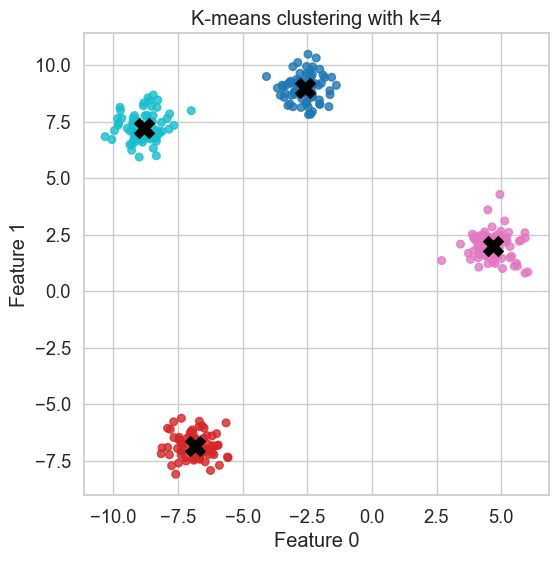

In [5]:
best_k = 4
km4 = KMeans(n_clusters=best_k, random_state=42)
labels4 = km4.fit_predict(X)
centroids = km4.cluster_centers_

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=labels4, s=30, cmap='tab10', alpha=0.8)
plt.scatter(centroids[:,0], centroids[:,1], s=200, c='black', marker='X')
plt.title("K-means clustering with k=4")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()


### 🧐 Interpretation

- Clusters are well-separated; centroids represent cluster centres.
- Silhouette ≥ 0.5 indicates reasonably distinct clusters in this case.
- Davies–Bouldin < 1 is also indicative of good clustering.
